In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [20]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [24]:
# Save references to each table
measurements= Base.classes.measurement
station= Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
recent_date = session.query(measurements.date).order_by((measurements.date).desc()).first()
print(recent_date)

('2017-08-23',)


In [90]:
recent_date= list(recent_date)
recent_date="".join(recent_date)
#recent_date = dt.datetime.strptime(recent_date, "%Y-%m-%d")
recent_date

'2017-08-23'

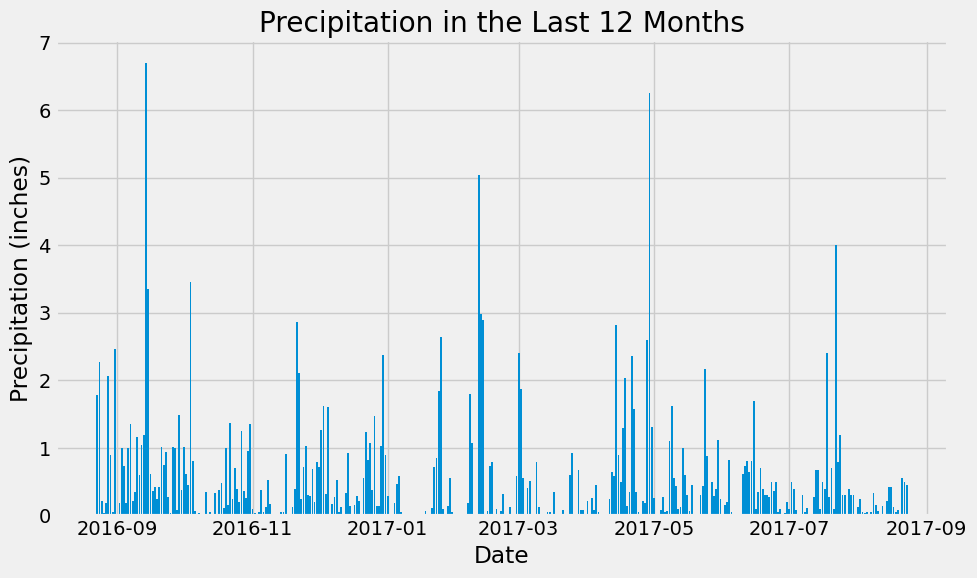

In [108]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
#one_year_ago= dt.date(recent_date) - dt.timedelta(days=365)
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel=[measurements.date, measurements.prcp]
scores= session.query(*sel).filter(measurements.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df= pd.DataFrame(scores, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df["Date"] = pd.to_datetime(df["Date"]) 
df.sort_values("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(df["Date"], df["Precipitation"])
plt.title("Precipitation in the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()

In [113]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation= pd.DataFrame(scores,columns=["Date", "Precipitation"])
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [124]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurements.station, func.count(measurements.id)]
active_stations = session.query(*sel).group_by(measurements.station).order_by(func.count(measurements.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)]
most_active = session.query(*sel).group_by(measurements.station).order_by(func.count(measurements.id).desc()).first()
most_active

(54.0, 85.0, 71.66378066378067)

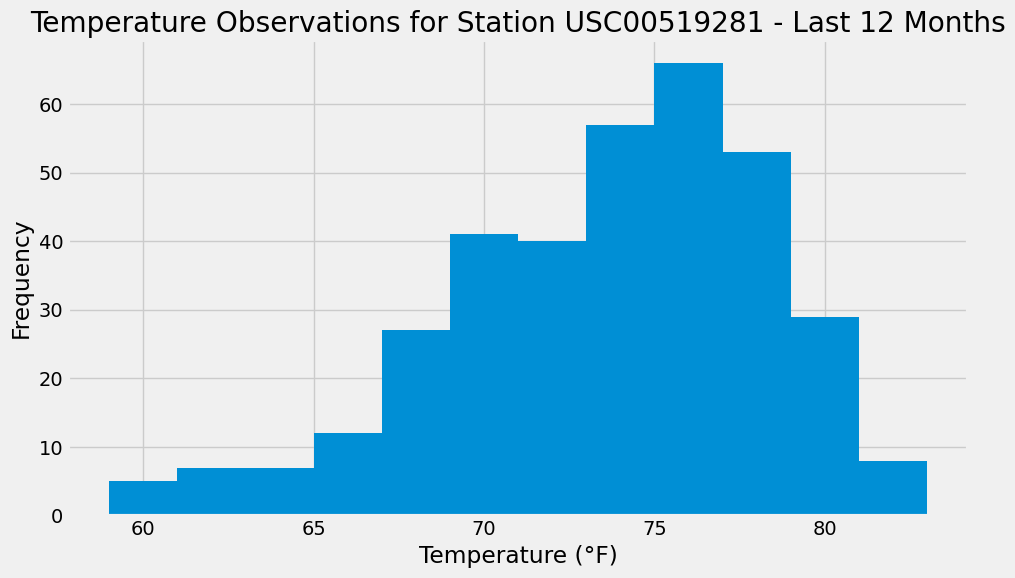

In [140]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_id = active_stations[0][0]

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

sel=[measurements.tobs]
temperature= session.query(*sel).filter(measurements.station == most_active_id).filter(measurements.date >= one_year_ago).\
order_by(measurements.date).all()

df= pd.DataFrame(temperature, columns=["Temperature"])

plt.figure(figsize=(10, 6))
plt.hist(df["Temperature"], bins=12)
plt.title(f"Temperature Observations for Station {most_active_id} - Last 12 Months")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [142]:
# Close Session
session.close()